In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2
import src.edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ind = erk.read_ind_returns(data_loc='./data')

In [4]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [7]:
er = erk.annualized_returns(ind["1996":"2000"])
cov = ind["1996":'2000'].cov()

In [9]:
def portfolio_returns(weights, returns):
    '''
    Takes a weights vector and expected returns vector and returns expected returns
    Formula transpose(W)Xreturns
    '''    
    return weights.T @ returns

In [11]:
def portfolio_volatility(weights, cov):
    '''
    Takes a weight vector and covariance as inputs and returns std. dev of portfolio
    sqrt(transpose(w) X cov X w)
    '''
    return (weights.T @ cov @ weights)**0.5

In [12]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [13]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [14]:
#assign equal weights
weights = np.repeat(1/4,4)

In [15]:
portfolio_returns(weights, er[l])

0.19511097196038413

In [16]:
portfolio_volatility(weights, cov.loc[l,l])

0.055059195776437045

In [17]:
erk.portfolio_returns(weights, er[l])

0.19511097196038413

In [18]:
erk.portfolio_volatility(weights, cov.loc[l,l])

0.055059195776437045

## Lets plot only a 2 asset frontier

In [20]:
l = ["Games", "Fin"]
n_points = 20

weights = [np.array([w, 1-w]) for w in np.linspace(0,1,n_points)]

In [21]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [24]:
rets = [erk.portfolio_returns(weights=w, returns=er[l]) for w in weights]
vol = [erk.portfolio_volatility(cov=cov.loc[l,l], weights=w) for w in weights]

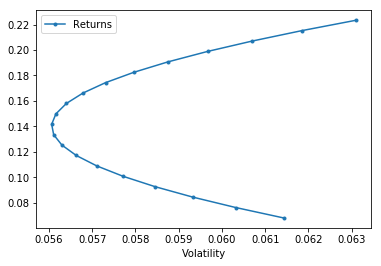

In [33]:
df = pd.DataFrame({"Returns": rets,
             "Volatility": vol})
df.plot.line(x="Volatility", y="Returns", style=".-")

In [37]:
def plot_ef2(n_points, er, cov, style=".-"):
    '''
    Plots efficient frontier for 2 assets
    Inputs:
        n_points: Number of different pairs of weights to try
        er: expected return vector (Series)
        cov: Pandas DataFrame containing the covariance of the assets
        style: For plotting
    '''
    
    # Generate the n_points of pairs of weights
    # Each pair must sum to 1
    weights = [np.array([w, 1-w]) for w in np.linspace(0,1,n_points)]
    
    # Get the portfolio expected return for each pair of weights
    rets = [erk.portfolio_returns(returns=er, weights=w) for w in weights]
    
    # Get the portfolio volatility for each pair of weights
    vol = [erk.portfolio_volatility(cov=cov, weights=w) for w in weights]
    
    df = pd.DataFrame({"Returns": rets,
                      "Volatility": vol})
    
    df.plot.line(x = "Volatility", y = "Returns", style=style)

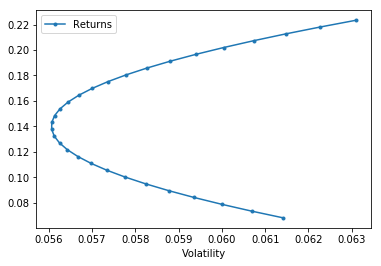

In [38]:
plot_ef2(30, er[l], cov.loc[l,l], style=".-")

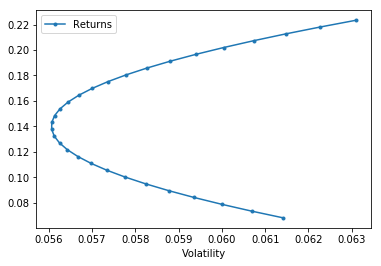

In [40]:
erk.plot_ef2(30, er[l], cov.loc[l,l], style=".-")

## N-Asset efficient frontier

In [41]:
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2
import src.edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from scipy.optimize import minimize


In [60]:
# Minimize volatility function
def minimize_volatility(target_return, er, cov):
    '''
    For a target_return, get the weights that have the minimum volatility
    Inputs:
        target_return: Floating point number representing the desired target retrun
        er: Expected returns of all assets. A pandas Series
        cov: A pandas data frame representing the covariance matrix of the assets
    '''
    
    # Get the number of assets we have:
    n = er.shape[0]
    
    # For the optimizer to work, we need to give it 
    # an objective function (which needs to be optimized)
    # and a set of constraints.
    # We need to provide an initial guess of weights.
    # Some people put all the money in one asset as the initial 
    # guess. But we will put equal weights for all the assets
    # as an initial guess.
    
    init_guess = np.repeat(1/n, n)
    
    # Let us provide the constraints
    
    # Constraint-1: Provide bounds for weights
    # -------------
    # Each weight must be confined to the interval: [0,1]
    # If the weight is negative, then it is equivalent to 
    # going short.
    # If the weight is beyond 1, then it is equivalent to 
    # leverage.
    # Hence the weight must be within the interval: [0,1]    
    # You have to provide a sequence of bounds for every weight.    
    # Note: In the below statement, the extra comma(,) is necessary,
    # as if we just include ((0,1)), then the outer parenthesis 
    # will be treated as normal parenthesis in a mathematical expression
    # and hence ((0,1)) is equivalent to (0,1)
    # ((0,1),) will be equal to a tuple with one element (0,1)
    
    bounds = ((0.0, 1.0),) * n
    
    # Constraint-2: 
    # -------------
    # The weights when matrix multiplied with expected returns must 
    # give us desired returns.
    # 
    # That is transpose(weights) X Expected_Returns = Desired_Return
    # Here the weights are the ones which are found by the optimizer,
    # and those determined weights must satisfy this constraint
    # The desired weight is nothing but target_return parameter
    # This constraint is an equality constraint. 
    # The minimize() function of scipy.optimize works as follows:
    #   For each set of weights the optimizer generates, it will 
    #   check whether this constraint function returns 0 or not
    #   If 0 is returned then the constraint is said to be satisfied,
    #   else it is dissatisfied.
    #   Therefore write a function that returns the following:
    #   target_return - Weights.T @ er
    
    # In the below statement, 'args' will take all the arguments 
    # that are needed for the 'fun', except the first parameter 
    # (weights in this example). The first parameter is the one 
    # that we optimize
    return_is_target = {
        'type': 'eq',
        'args': (er,), 
        'fun' : lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    
    # Constraint-3:
    # -------------
    # Sum of all weights must sum to 1
    # Similar to constraint-2, the function must return 0
    # when the constraint is satisfied.
    
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    # We defined 3 constraints:
    # Constraint-1: For bounds on weights
    # Constraint-2: Calculated return using the 
    #               weights is the target return
    # Constraint-3: Weights sum to 1
    
    # Now we are ready to call the optimizer
    # We already imported the optimizer as 
    # from scipy.optimize import minimize
    
    # The minimize() function will take the objective function
    # which is nothing but the portfolio volatility
    # We already written a function portfolio_volatility(weights, cov)
    # The weights are the ones the function will optimize.
    # The initial weights are assigned to the init_weights 
    # The args (except the weights arg, which must be the first argument of 
    # portfolio_volatility) will be supplied using the 'args' option
    # 'args' = (cov)
    # We will use 'SLSQP' as the quadratic programming optimizer
    # method = 'SLSQP'
    # You need to also supply the constraints and bounds we created.
    # The minimize() function will produce a lot of informational 
    # messages. So supress those messages using disp
    
    results = minimize(erk.portfolio_volatility,
                      init_guess,
                      args=(cov),
                      method='SLSQP',
                      options={'disp': False},
                      constraints=(return_is_target,
                      weights_sum_to_1),
                      bounds=bounds)
    
    #The optimized weigts are present in results.x
    return results.x

In [61]:
l = ["Games", "Fin"]

w15 = minimize_volatility(0.15, er[l], cov.loc[l,l])
w15

array([0.47287631, 0.52712369])

In [62]:
vol15 = erk.portfolio_volatility(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [64]:
l = ["Games", "Fin"]

w15 = erk.minimize_volatility(0.15, er[l], cov.loc[l,l])
w15

array([0.47287631, 0.52712369])

In [65]:
def optimimal_weights(n_points, er, cov):
    '''
    Generated a tuple of optimal weights for each desired expected return
    Input:
        n_points: Number of desired returns in the range of [min(er), max(er)]
        er: A numpy array of expected returns
        cov: A pandas data frame consisting the covariance matrix of the asset returns
    '''
    
    target_returns = np.linspace(er.min(), er.max(), n_points)
    
    weights = [minimize_volatility(r, er, cov) for r in target_returns]
    
    return weights

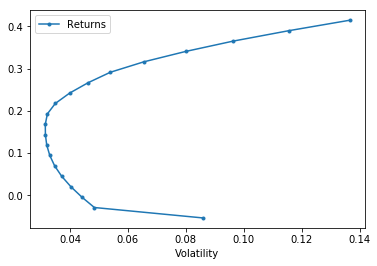

In [71]:
erk.plot_ef(20, er, cov, style='.-')